# What is Groupby in Pandas?

In this notebook, I'm going to show the groupby method in Pandas.
</br>
Happy Learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,-0.214667,1.194869
1,a,two,-1.285376,-0.305300
2,b,three,-0.410446,0.341516
3,b,one,-0.012042,0.390772
4,a,two,-0.284458,-0.445131
5,b,three,-0.151124,-0.247470


In [3]:
group=df["data1"].groupby(df["key1"])

In [4]:
group

In [5]:
group.mean()

key1
a   -0.594834
b   -0.191204
Name: data1, dtype: float64

In [6]:
ave=df["data1"].groupby([df["key1"],
                         df["key2"]]).mean()
ave

key1  key2 
a     one     -0.214667
      two     -0.784917
b     one     -0.012042
      three   -0.280785
Name: data1, dtype: float64

In [7]:
ave.unstack()

key2,one,three,two
key1,,,
a,-0.214667,NaN,-0.784917
b,-0.012042,-0.280785,NaN


In [10]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                     
a    one   -0.214667  1.194869
     two   -0.784917 -0.375216
b    one   -0.012042  0.390772
     three -0.280785  0.047023

## Iterating over Groups

In [11]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.214667  1.194869
1    a  two -1.285376 -0.305300
4    a  two -0.284458 -0.445131
b
  key1   key2     data1     data2
2    b  three -0.410446  0.341516
3    b    one -0.012042  0.390772
5    b  three -0.151124 -0.247470


In [12]:
for (x1,x2),group in df.groupby(["key1",
                                 "key2"]):
    print(x1,x2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one -0.214667  1.194869
a two
  key1 key2     data1     data2
1    a  two -1.285376 -0.305300
4    a  two -0.284458 -0.445131
b one
  key1 key2     data1     data2
3    b  one -0.012042  0.390772
b three
  key1   key2     data1     data2
2    b  three -0.410446  0.341516
5    b  three -0.151124 -0.247470


In [13]:
piece=dict(list(df.groupby("key1")))

In [14]:
piece["a"]

,key1,key2,data1,data2
0,a,one,-0.214667,1.194869
1,a,two,-1.285376,-0.305300
4,a,two,-0.284458,-0.445131


## Selecting a Column or Subset of Columns

In [15]:
df.groupby(['key1', 
            'key2'])[['data1']].mean()

data1
key1 key2           
a    one   -0.214667
     two   -0.784917
b    one   -0.012042
     three -0.280785

## Grouping with Dicts and Series

In [16]:
fruit=pd.DataFrame(np.random.randn(4,4),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"])
fruit

,a,b,c,d
apple,0.572378,0.513373,-0.741887,-0.063008
cherry,-2.436243,-0.889880,0.286955,1.159288
banana,-1.639823,0.820665,1.277137,0.454902
kiwi,-1.289139,0.870740,-0.632130,1.066439


In [17]:
label={"a": "green","b":"yellow",
       "c":"green","d":"yellow",
       "e":"purple"}

In [19]:
group.sum()

,green,yellow
apple,-0.169509,0.450365
cherry,-2.149287,0.269408
banana,-0.362687,1.275567
kiwi,-1.921269,1.937179


In [20]:
s=pd.Series(label)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [26]:
transposed_fruit = fruit.T

In [27]:
grouped_count = transposed_fruit.groupby(s).count()
print(grouped_count)

        apple  cherry  banana  kiwi
green       2       2       2     2
yellow      2       2       2     2


## Grouping with Functions

In [28]:
fruit.groupby(len).sum()

,a,b,c,d
4,-1.289139,0.870740,-0.632130,1.066439
5,0.572378,0.513373,-0.741887,-0.063008
6,-4.076066,-0.069214,1.564092,1.614190


## Grouping by Index Levels

In [29]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]])

In [30]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0      -1.295150 -2.069636  0.741770 -0.501876 -0.653002
1      -0.326543  0.286733 -0.355496 -1.493611  0.394602
2       1.273815 -0.559692 -0.654297 -0.210803 -1.535929
3       0.798751 -1.139521 -1.948846 -0.063154  1.115296

In [32]:
transposed_data = data.T

In [33]:
grouped_sum = transposed_data.groupby(level="letter").sum()
print(grouped_sum)

               0         1         2         3
letter                                        
A      -2.623015 -0.395307  0.059826 -2.289616
B      -1.154879 -1.099008 -1.746732  1.052142


## Application with Real Data Set 

In [34]:
game=pd.read_csv("DataSets/vgsalesGlobale.csv")

In [35]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [37]:
game.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [38]:
game.Global_Sales.mean()

0.5374406555006628

In [39]:
group=game.groupby("Genre")

In [40]:
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [41]:
group["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [42]:
game[game.Genre=="Action"].Global_Sales.mean()

0.5281001206272617

In [44]:
%matplotlib inline

<Axes: xlabel='Genre'>

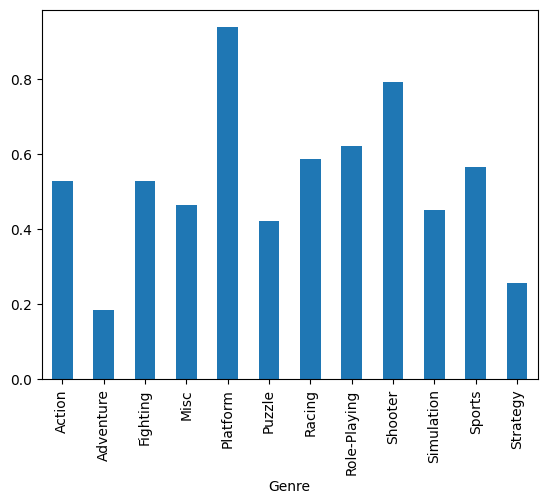

In [45]:
group["Global_Sales"].mean().plot(kind="bar")

<Axes: xlabel='Genre'>

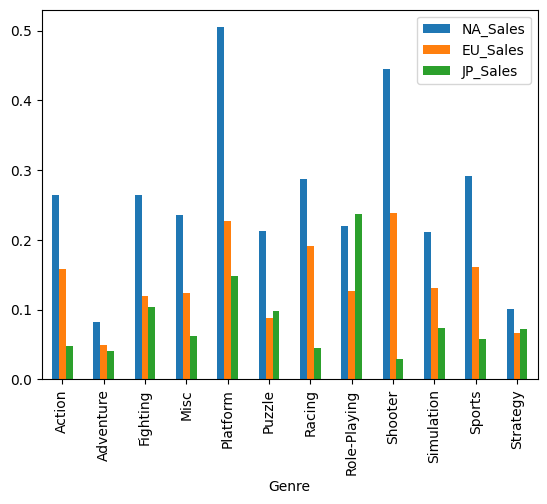

In [46]:
group[["NA_Sales",
       "EU_Sales",
       "JP_Sales"]].mean().plot(kind="bar")